In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-housing/USA_Housing.csv


In [2]:
df=pd.read_csv('../input/usa-housing/USA_Housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [4]:
df.shape

(5000, 6)

In [5]:
import missingno as ms

In [6]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

<AxesSubplot:>

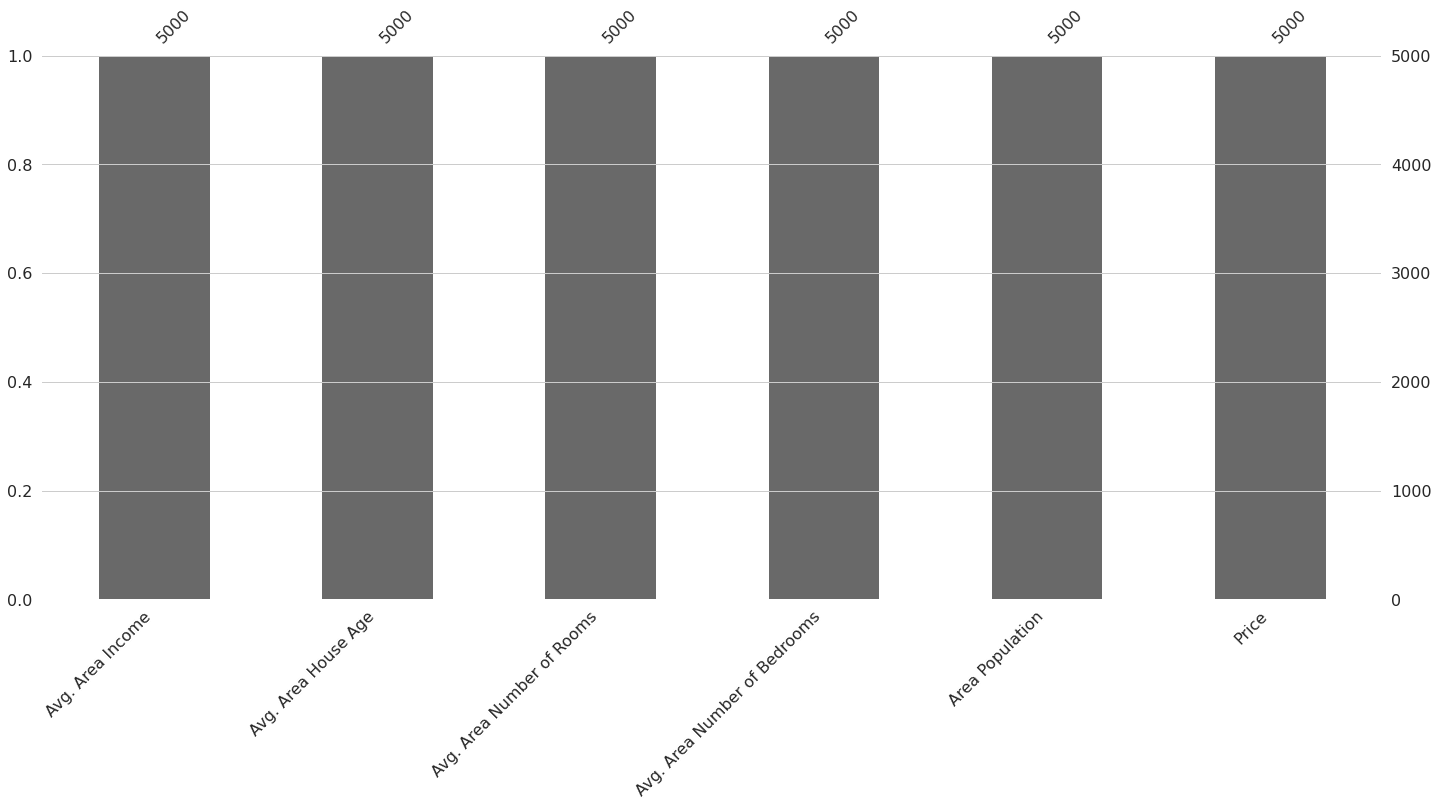

In [7]:
ms.bar(df)

In [8]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [9]:
df.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1060193.786
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1482617.729
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1030729.583
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1198656.872
4999,65510.58180,5.992305,6.792336,4.07,46501.28380,1298950.480


In [10]:
features_cat=[]
features_num=[]
for feature in df.columns:
    if df[feature].dtype=='object':
        features_cat.append(feature)
    else:
        features_num.append(feature)

In [11]:

print(features_cat)


[]


In [12]:

print(features_num)

['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']


In [13]:
# plotting outliers
# for c in features_num:
# ax=sns.boxplot(x='Avg. Area Number of Rooms',y='Price',data=df)

In [14]:
# Y=df['Price']

In [15]:
# df.drop(['Price'],axis=1,inplace=True)

Text(0.5, 1.0, 'Pearson Correlation Heatmap')

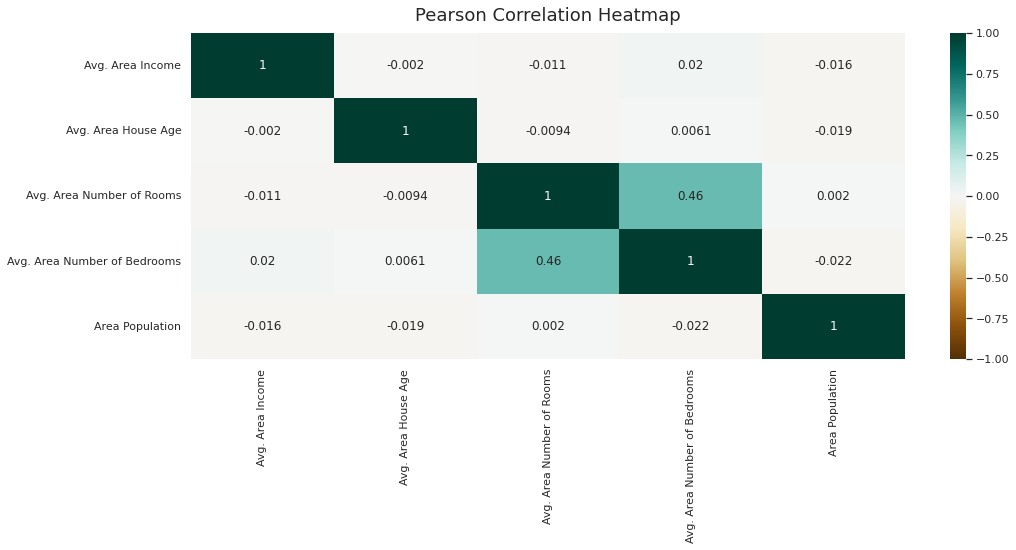

In [16]:


plt.figure(figsize=(16,6))
heatmap=sns.heatmap(df.iloc[:,0:5].corr(),vmin=-1,vmax=1,annot=True,cmap='BrBG')
heatmap.set_title('Pearson Correlation Heatmap',fontdict={'fontsize':18},pad=12)



In [17]:
# Since correlation between features is less (not greater than 0.7 or 0.8), so feature selection/extraction is not required.

In [18]:
X=df.iloc[:,0:5]
Y=df.iloc[:,5]


In [19]:
Y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [20]:


def plot_hist(variable):
    plt.figure(figsize = (9,3))
    sns.histplot(df[variable], bins = 30,kde=True)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()
    



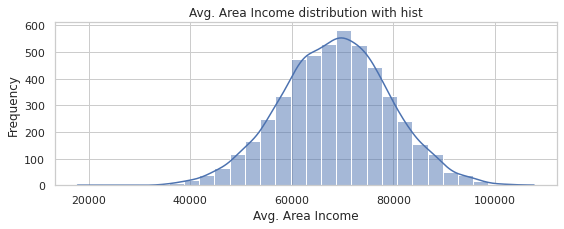

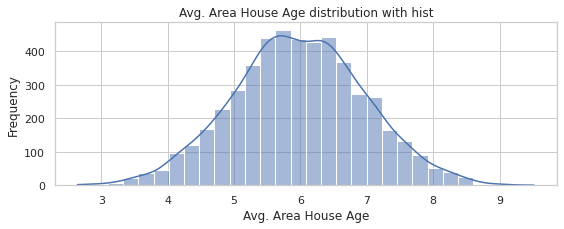

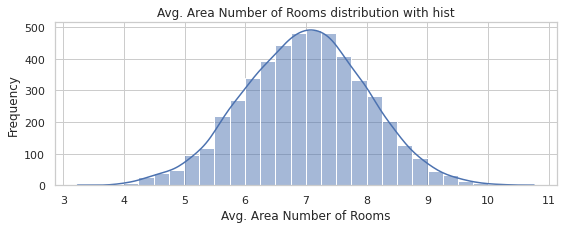

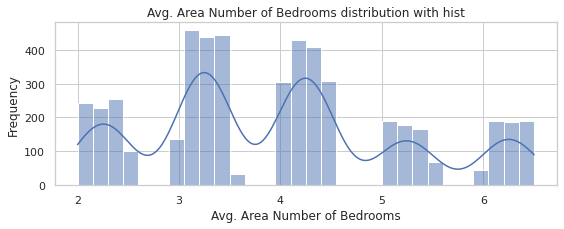

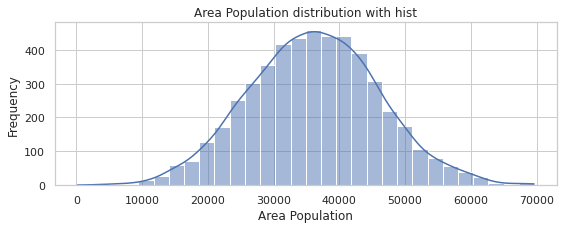

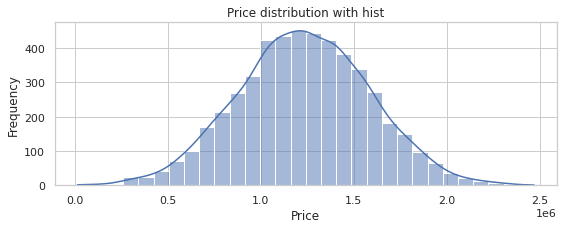

In [21]:
for c in features_num:
    plot_hist(c)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
minmax=MinMaxScaler()
X_scaled=minmax.fit_transform(X)

In [24]:
X_scaled

array([[0.68682217, 0.44198584, 0.50150158, 0.46444444, 0.3299422 ],
       [0.68352073, 0.48853836, 0.46450137, 0.24222222, 0.57596801],
       [0.48373705, 0.46860901, 0.70135011, 0.69555556, 0.52858204],
       ...,
       [0.50713527, 0.67002636, 0.20853446, 0.02888889, 0.47651494],
       [0.55841872, 0.4203891 , 0.51757886, 0.76444444, 0.61128233],
       [0.53071451, 0.48699729, 0.47267788, 0.46      , 0.66708815]])

In [25]:
X_scaled=np.insert(X_scaled,0,values=1,axis=1)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=42)

In [27]:
# What is a random state object?

In [28]:
A=X_train.T.dot(X_train)
B=np.linalg.inv(A)
C=B.dot(X_train.T)
beta=C.dot(Y_train)
print(beta)



[-1420800.99805224  1944269.98862085  1138398.16273014   901511.66456645
    10624.92868879  1056777.9239611 ]


In [29]:
Y_predict=X_test.dot(beta)
print(Y_predict)

[1308536.13611171 1237122.72747114 1243835.62809529 ... 1457119.79300221
 1483428.95296539 1047510.5974198 ]


In [30]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(Y_test,Y_predict)

0.9146818498916262

In [31]:
print(mean_squared_error(Y_test,Y_predict))
print(np.sqrt(mean_squared_error(Y_test,Y_predict)/len(Y_test)))

10068422549.495768
2590.807152156224


In [32]:
BETA=[]
R2=[]

In [33]:

def model(X_train,Y_train,X_test,Y_test):
    A=X_train.T.dot(X_train)
    B=np.linalg.inv(A)
    C=B.dot(X_train.T)
    beta=C.dot(Y_train)
    BETA.append(beta)
    Y_predict=X_test.dot(beta)
    val=r2_score(Y_test,Y_predict)
    R2.append(val)
#     print(beta)
    

In [34]:
# implementing KFold
from sklearn.model_selection import KFold
kf=KFold()
for train_index,test_index in kf.split(X):
#     print("TRAIN INDEX: ",train_index," TEST INDEX: ",test_index)
    X_train,X_test=X_scaled[train_index],X_scaled[test_index]
    Y_train,Y_test=Y.iloc[train_index],Y.iloc[test_index]
    model(X_train,Y_train,X_test,Y_test)
    
    

In [35]:
BETA

[array([-1422826.49058152,  1939707.44686446,  1137661.5980838 ,
          904570.15373279,    12886.39203736,  1062629.53134164]),
 array([-1415097.52771116,  1926560.46870718,  1145623.78774051,
          916657.86906762,     6188.46744136,  1050035.41463358]),
 array([-1423350.9249485 ,  1946511.37171665,  1134205.13423584,
          910146.97109358,     9555.10727824,  1056104.51551668]),
 array([-1414578.41177666,  1939689.35012526,  1140921.3872321 ,
          895697.76568003,     4099.75517049,  1058866.32351349]),
 array([-1418234.68515569,  1946919.61411601,  1135596.09355141,
          911763.12050532,     4547.40335148,  1050234.71063084])]

In [36]:
print(R2)

[0.9175899480765111, 0.9203015496401115, 0.9152429915320013, 0.9208503836977665, 0.9138111758717492]


In [37]:
Index=R2.index(max(R2))
opt_beta=BETA[Index]

In [38]:
opt_beta

array([-1414578.41177666,  1939689.35012526,  1140921.3872321 ,
         895697.76568003,     4099.75517049,  1058866.32351349])

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=42)
Y_predict=X_test.dot(opt_beta)
val=r2_score(Y_test,Y_predict)
# R2.append(val)
print(val)

0.9146868482147408


In [40]:
# There is a very minor increase in the r2 score